In [86]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [87]:
# Import google colab to drive for dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/MyDrive/Colab Notebooks/sagar/Supermart Grocery Sales - Retail Analytics Dataset.csv"



Mounted at /content/drive
'/content/drive/MyDrive/Colab Notebooks/sagar/Supermart Grocery Sales - Retail Analytics Dataset.csv'


In [88]:
# name data= dataset , import dataset loceation
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sagar/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [89]:
# Reviewing tables
dataset.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [90]:
# loads csv file from google drive
file_path = "/content/drive/MyDrive/Colab Notebooks/sagar/Supermart Grocery Sales - Retail Analytics Dataset.csv"
dataset = pd.read_csv(file_path)


In [91]:
# clean lines and fromat to look consistent
dataset['Category'].str.strip().str.title()

,Category
0,Oil & Masala
1,Beverages
2,Food Grains
3,Fruits & Veggies
4,Food Grains
...,...
9989,"Eggs, Meat & Fish"
9990,Bakery
9991,Food Grains
9992,Oil & Masala


In [92]:
# inforation about dataset , column name , data types , missing values..
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [93]:
# show rows and columns
dataset.shape

(9994, 11)

In [94]:
# show unique order ids , for missing values
dataset['Discount']

,Discount
0,0.12
1,0.18
2,0.21
3,0.25
4,0.26
...,...
9989,0.16
9990,0.26
9991,0.16
9992,0.15


In [95]:
#isnull() use for find null(empty values)
dataset.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [96]:
# find different  categories in 'category '
dataset['Category'].nunique()

7

In [97]:
# shows all different types of cayegory
dataset['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [98]:
# find differents categories in sub category
dataset['Sub Category'].nunique()

23

In [99]:
# show the order belong to each category
dataset ['Category'].value_counts()

,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


In [100]:
# tell us total sales and profit foe each category , by highest selling category ( in descending order)
dataset.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)

,Sales,Profit
Category,,
"Eggs, Meat & Fish",2267401,567357.22
Snacks,2237546,568178.85
Food Grains,2115272,529162.64
Bakery,2112281,528521.06
Fruits & Veggies,2100727,530400.38
Beverages,2085313,525605.76
Oil & Masala,2038442,497895.29


In [101]:

dataset.duplicated().sum()



np.int64(0)

In [102]:
# shows total sales and profit for each sub-category and orders ,
# from highest-selling to lowest-selling.

dataset.groupby('Sub Category')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)

,Sales,Profit
Sub Category,,
Health Drinks,1051439,267469.79
Soft Drinks,1033874,258135.97
Cookies,768213,190643.70
Breads & Buns,742586,190764.98
Noodles,735435,193685.81
Chocolates,733898,183849.34
Masalas,697480,168999.11
Cakes,685612,168398.46
Biscuits,684083,169357.62


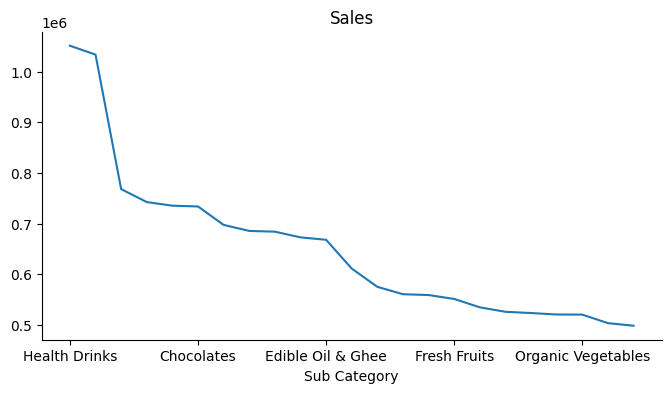

In [103]:
from matplotlib import pyplot as plt
_df_8['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

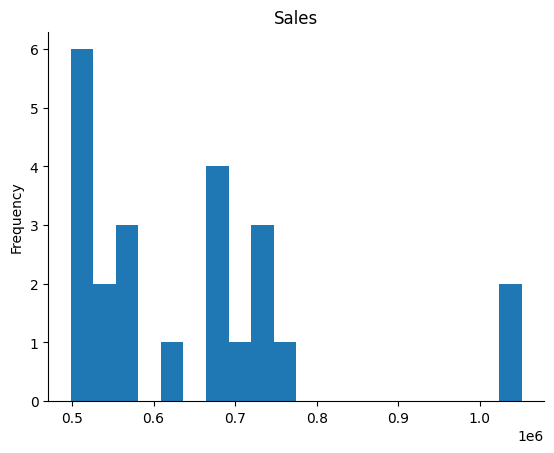

In [104]:
from matplotlib import pyplot as plt
_df_5['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [105]:
# change date format into proper format
dataset['Order Date']=pd.to_datetime(dataset['Order Date'], format='mixed')

In [106]:
dataset['Order Date']

,Order Date
0,2017-11-08
1,2017-11-08
2,2017-06-12
3,2016-10-11
4,2016-10-11
...,...
9989,2015-12-24
9990,2015-07-12
9991,2017-06-06
9992,2018-10-16


In [107]:
# show different region in dataset
dataset['Region'].unique()

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [108]:
# shows total sales and profit for each region, from highest to lowest selling by region .
dataset.groupby('Region')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)

,Sales,Profit
Region,,
West,4798743,1192004.61
East,4248368,1074345.58
Central,3468156,856806.84
South,2440461,623562.89
North,1254,401.28


/tmp/ipython-input-2770885819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sales_by_cat.index, x=sales_by_cat.values, palette='Blues_r', legend=False)


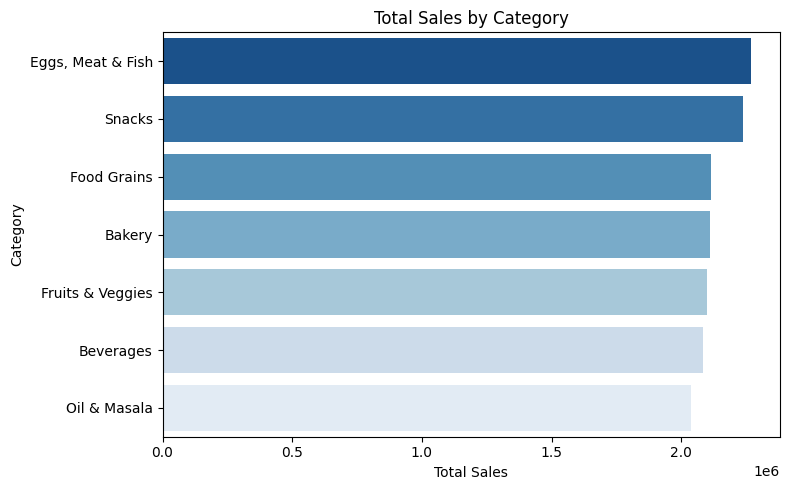

In [122]:
# Clean up column names by removing leading/trailing spaces
dataset.columns = dataset.columns.str.strip()

sales_by_cat = dataset.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(y=sales_by_cat.index, x=sales_by_cat.values, palette='Blues_r', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

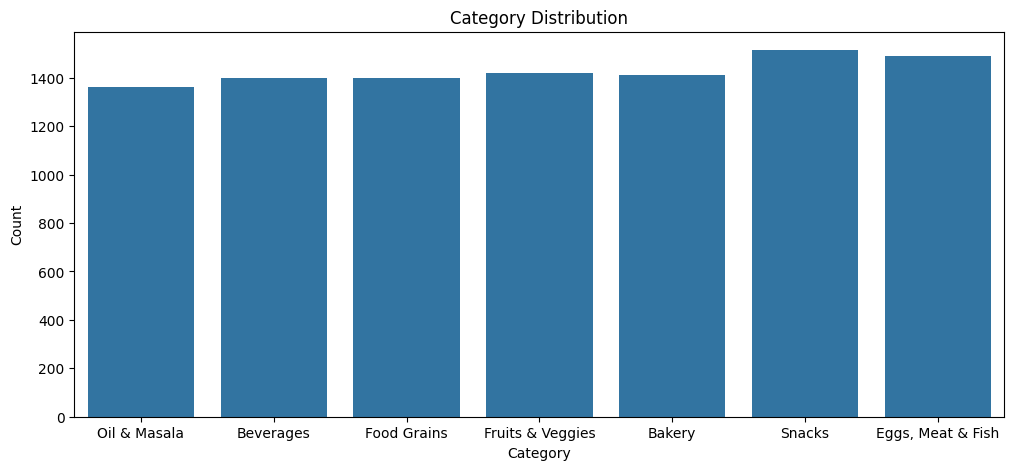

In [110]:

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Category', data=dataset, ax=ax)
plt,plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


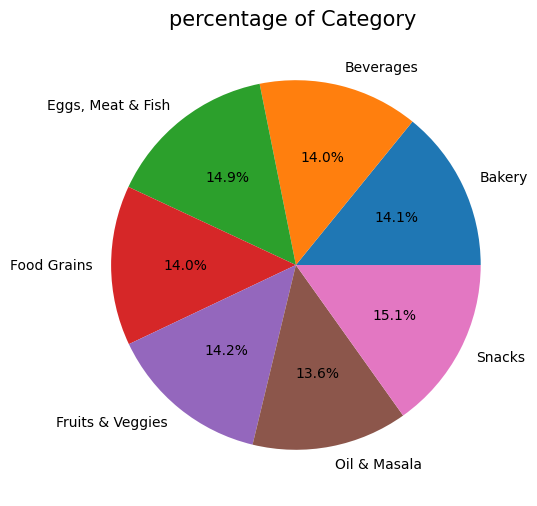

In [111]:
# show the percentage od category
plt.figure(figsize =(10,6))
gb = dataset.groupby('Category').agg({'Category' : 'count'})
plt.pie(gb['Category'], labels=gb.index, autopct='%1.1f%%')
plt.title('percentage of Category ', fontsize = 15)
plt.show()

In [112]:
dataset.head(4)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu


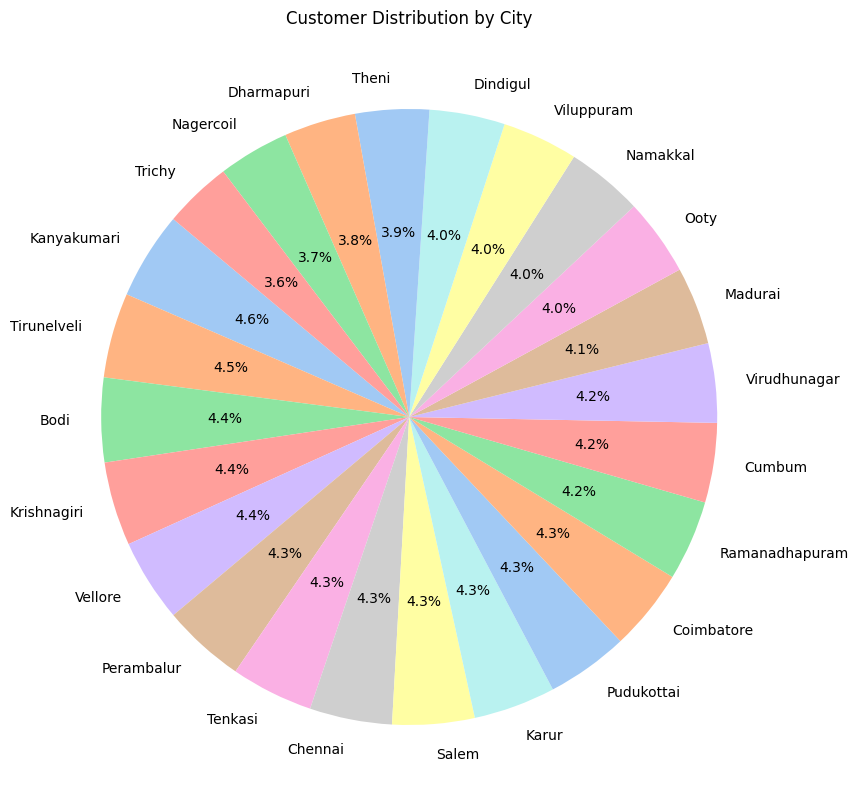

In [113]:

city_counts = dataset['City'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by City')
plt.show()


In [114]:
dataset.columns.values

array(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype=object)

In [115]:
# Convert Order Date to datetime
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

# Extract year and month for trend analysis
dataset['Year'] = dataset['Order Date'].dt.year
dataset['Month'] = dataset['Order Date'].dt.to_period('M')
print()


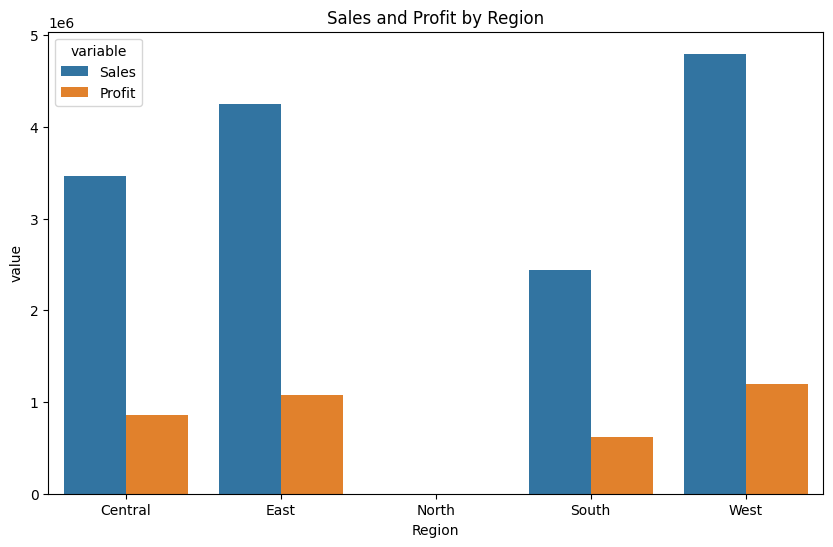

In [116]:
# Sales and profit by region
region_sales_profit = dataset.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(10,6))
region_sales_profit_melted = region_sales_profit.melt(id_vars='Region', value_vars=['Sales', 'Profit'])
sns.barplot(data=region_sales_profit_melted, x='Region', y='value', hue='variable')
plt.title('Sales and Profit by Region')
plt.show()

In [123]:
dataset['Profit'].sum()


np.float64(3747121.1999999997)

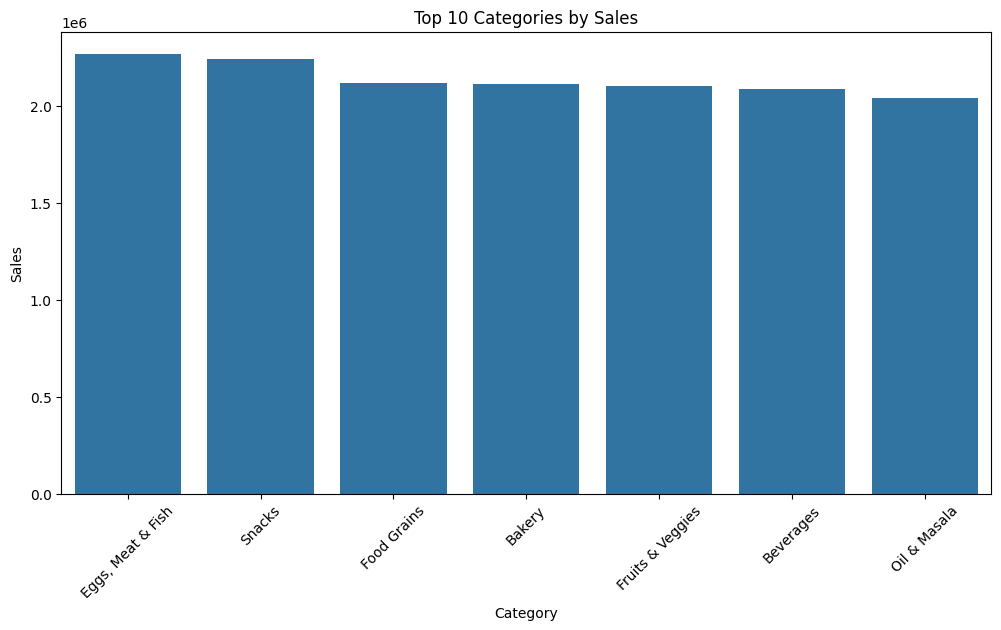

In [117]:
# Top 10 categories by sales and profit
top_categories = dataset.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.index, y=top_categories['Sales'])
plt.title('Top 10 Categories by Sales')
plt.xticks(rotation=45)
plt.show()

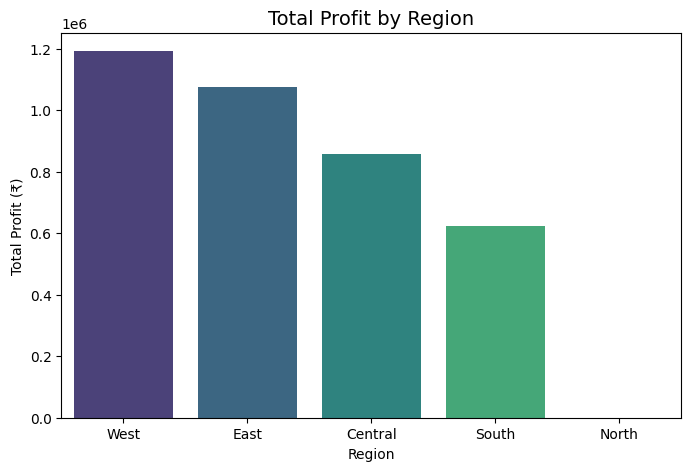

In [133]:
region_profit = dataset.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_profit.index, y=region_profit['Profit'], hue=region_profit.index,
            palette='viridis', legend=False)
plt.title("Total Profit by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Profit (₹)")
plt.show()


# by category


In [126]:
profit_by_category = dataset.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(profit_by_category)


Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Food Grains          529162.64
Bakery               528521.06
Beverages            525605.76
Oil & Masala         497895.29
Name: Profit, dtype: float64


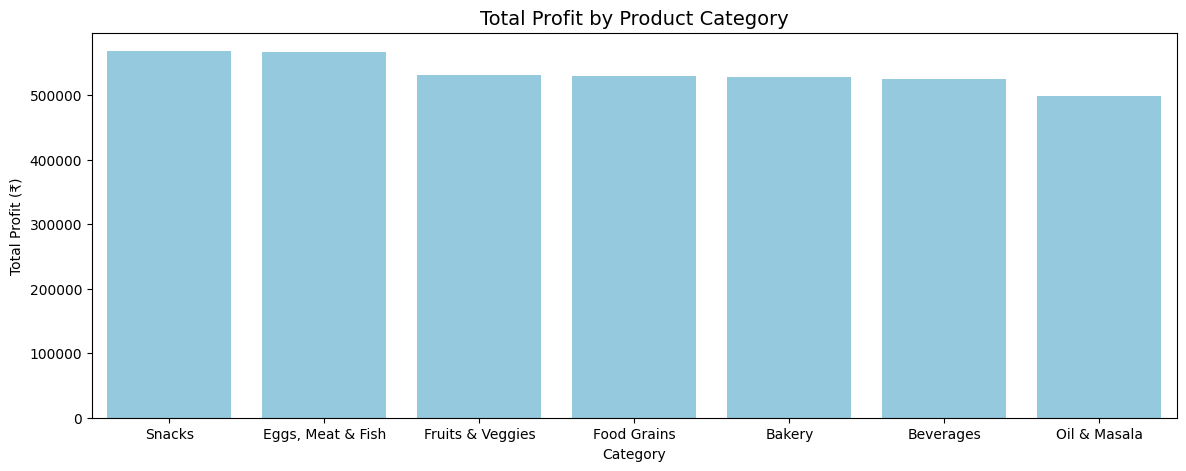

In [132]:
plt.figure(figsize=(14,5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, color='skyblue')
plt.title("Total Profit by Product Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Profit (₹)")
plt.show()


# Profit by Region

In [128]:
profit_by_region = dataset.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print(profit_by_region)


Region
West       1192004.61
East       1074345.58
Central     856806.84
South       623562.89
North          401.28
Name: Profit, dtype: float64


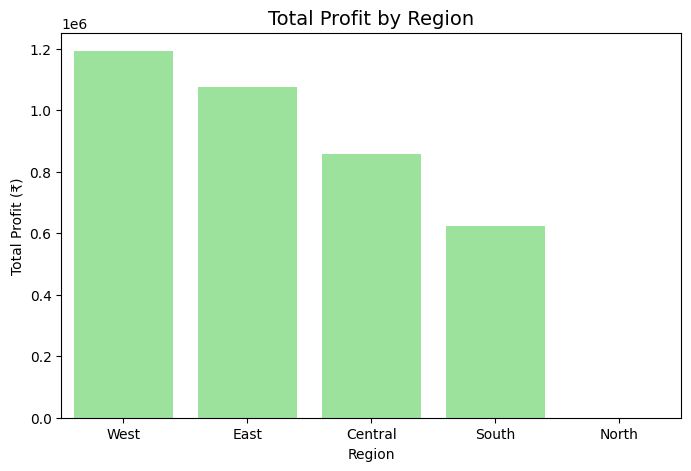

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, color='lightgreen')
plt.title("Total Profit by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Profit (₹)")
plt.show()


Profit by Sub-Category

In [129]:
profit_by_subcategory = dataset.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)
print(profit_by_subcategory.head(10))  # top 10 subcategories


Sub Category
Health Drinks        267469.79
Soft Drinks          258135.97
Noodles              193685.81
Breads & Buns        190764.98
Cookies              190643.70
Chocolates           183849.34
Biscuits             169357.62
Masalas              168999.11
Edible Oil & Ghee    168593.58
Cakes                168398.46
Name: Profit, dtype: float64


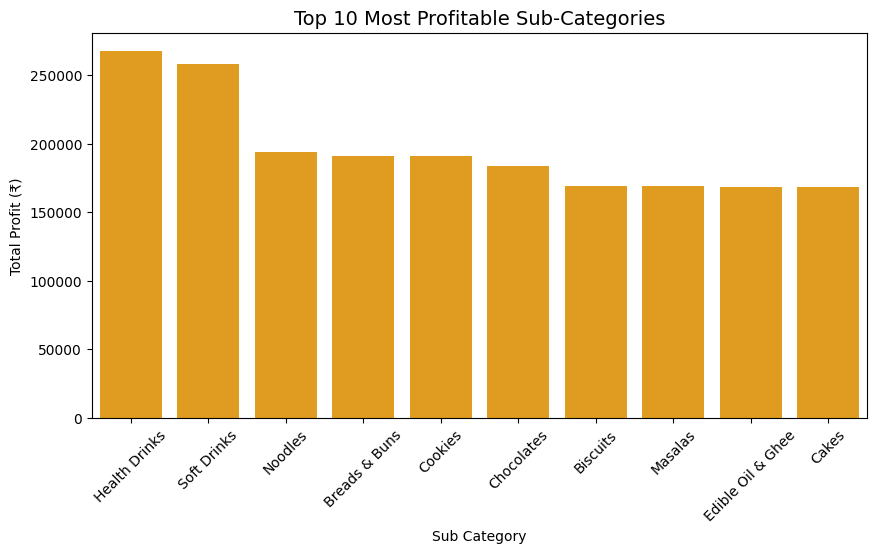

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=profit_by_subcategory.head(10).index, y=profit_by_subcategory.head(10).values, color='orange')
plt.title("Top 10 Most Profitable Sub-Categories", fontsize=14)
plt.xlabel("Sub Category")
plt.ylabel("Total Profit (₹)")
plt.xticks(rotation=45)
plt.show()


# total profit

In [130]:
profit_summary = {
    "Total Profit": dataset['Profit'].sum(),
    "Average Profit per Order": dataset['Profit'].mean(),
    "Max Region Profit": dataset.groupby('Region')['Profit'].sum().max(),
    "Min Region Profit": dataset.groupby('Region')['Profit'].sum().min()
}
pd.DataFrame(profit_summary, index=["Profit Summary"])


,Total Profit,Average Profit per Order,Max Region Profit,Min Region Profit
Profit Summary,3747121.2,374.937082,1192004.61,401.28


In [118]:
# Calculate total sales per customer
total_sales = dataset.groupby('Customer Name')['Sales'].sum()

# Calculate number of orders per customer
order_counts = dataset.groupby('Customer Name').size()

# Combine into a single DataFrame
customer_summary = pd.DataFrame({
    'Total Sales': total_sales,
    'Order Count': order_counts
}).reset_index()

print(customer_summary.head(6))

  Customer Name  Total Sales  Order Count
0        Adavan       315341          205
1         Aditi       299674          187
2         Akash       307488          196
3          Alan       294397          198
4        Amrish       333351          227
5           Amy       301558          196


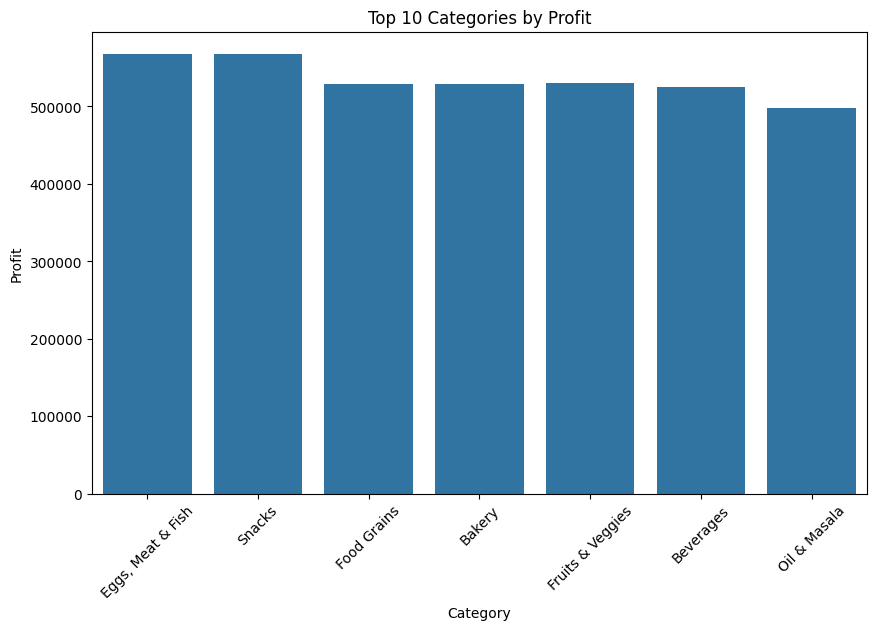

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.index, y=top_categories['Profit'])
plt.title('Top 10 Categories by Profit')
plt.xticks(rotation=45)
plt.show()

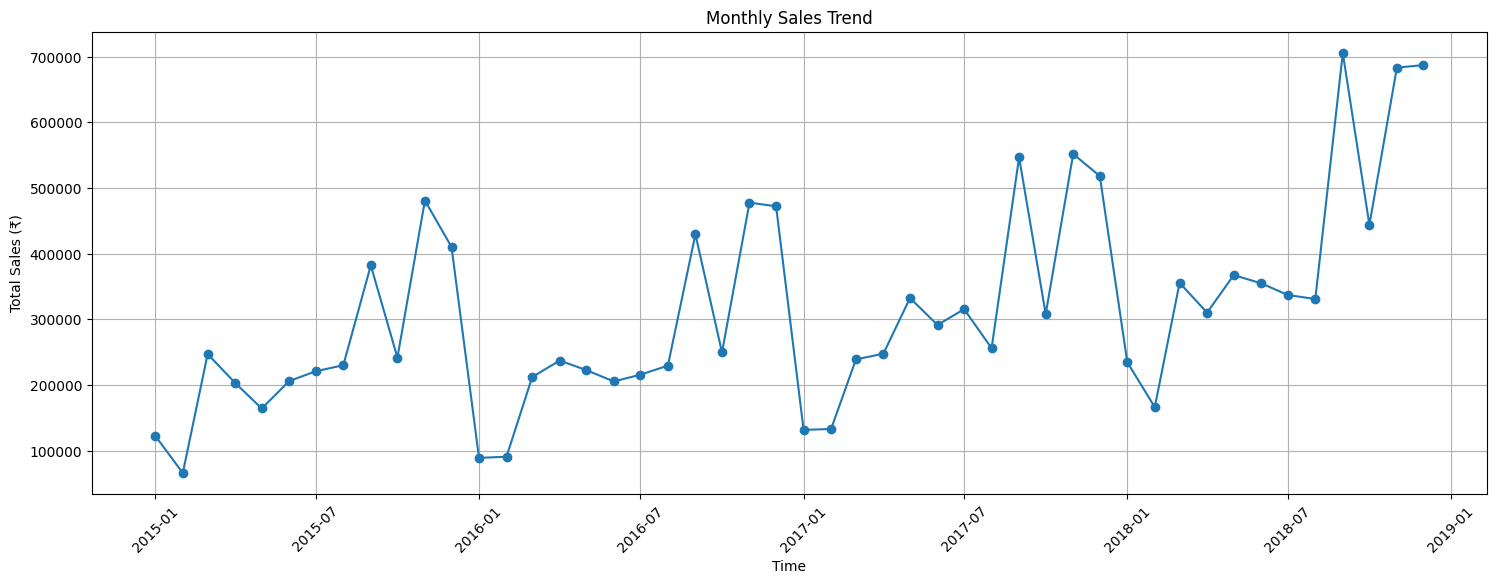

In [134]:


# Extract year and month from order date
dataset['Year'] = dataset['Order Date'].dt.year
dataset['Month'] = dataset['Order Date'].dt.month

# Aggregate sales by year and month
monthly_sales = dataset.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a datetime column for plotting
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot monthly sales trend
plt.figure(figsize=(18,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Time')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()